In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vadere_analysis_tool import ScenarioOutput, VadereProject
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})

def plotEvolution(vproject, ending, yval, ylabel):
    plots = []
    i = 1
    plt.figure(1, figsize=(30, 10))
    for outStr in project.output_dirs :
        out = project.output_dirs[outStr]
        dataFrames = []
        for fileStr in out.files :
            if fileStr.endswith(ending) :
                ndf = pd.DataFrame();
                df = out.files[fileStr]()
                #df = df[df.velocity > 0]
                ndf['density'] = df.density.astype(float)
                ndf['velocity'] = df.velocity.astype(float)
                ndf['timeStep'] = df.timeStep.astype(int)
                ndf['scenario'] = [out.scenario['name']] * len(df.density)
                dataFrames.append(ndf)
            #concatFrames = pd.concat(dataFrames)
        plt.subplot(2, 1, i)
        plt.title(out.scenario['name'])
        plt.xlabel('timeStep')
        plt.ylabel(ylabel)
        sns.lineplot(x='timeStep', y=yval, data=pd.concat(dataFrames))
        i = i + 1

def plotFundamentalDiagram(vproject, ending):
    dataFrames = []
    plt.figure(1, figsize=(20, 5))
    for outStr in project.output_dirs :
        out = project.output_dirs[outStr]
        for fileStr in out.files :
            if fileStr.endswith(ending) :
                ndf = pd.DataFrame();
                df = out.files[fileStr]()
                ndf['density'] = df.density.astype(float)
                ndf['velocity'] = df.velocity.astype(float)
                ndf['scenario'] = [out.scenario['name']] * len(df.velocity)
                #ndf = ndf[ndf.density < 7]
                dataFrames.append(ndf)
    concatFrames = pd.concat(dataFrames)
    g = sns.relplot(x="density", y="velocity", hue="scenario", data=concatFrames,
                height=10, aspect=2)
    plotWeidmann()
    
def plotFundamentalDiagramScatter(vproject, ending):
    dataFrames = []
    count = 1
    plt.figure(1, figsize=(20, 5))
    for outStr in project.output_dirs :
        out = project.output_dirs[outStr]
        for fileStr in out.files :
            if fileStr.endswith(ending) :
                ndf = pd.DataFrame();
                df = out.files[fileStr]()
                ndf['density'] = df.density.astype(float)
                ndf['velocity'] = df.velocity.astype(float)
                ndf['scenario'] = [out.scenario['name']] * len(df.velocity)
                #ndf = ndf[ndf.density < 7]
                #plt.scatter()
                plt.subplot((130+count))
                plt.title(out.scenario['name'])
                plt.xlabel('density')
                plt.ylabel('velocity')
                plt.legend(['A simple line'])
                plt.xticks([0,1,2,3,4,5,6])
                plt.yticks([0,0.5,1,1.5,2,2.5])
                plt.xlim(0,6)
                plt.ylim(0,2.5)
                fd = plt.scatter('density', 'velocity', data=ndf, marker='*', c='black', s=0.5)
                wm = plotWeidmann()
                plt.legend([fd, wm], ['Simulated data', 'Referenz Weidmann'])
                count = count + 1;

def plotWeidmann():
    wmaxDensity = 5.4
    wmeanVelocity = 1.34
    wgamma = 1.913
    wx = np.linspace(0.1, wmaxDensity, 100)
    return plotKladek(wx, wmeanVelocity, wgamma, wmaxDensity)

def plotKladek(x, v, gamma, pmax):
    result, = plt.plot(x, v * (1 - np.exp(-gamma * (1/x - 1/pmax))), c=sns.color_palette().as_hex()[1])
    return result

# Load the Vadere project

In [65]:
projectFolder = "./../../../../VadereModelTests/TestOSM_zhang-2011/"
project = VadereProject(projectFolder)
#out = project.named_output.C_050_180_180_2018_11_26_16_30_29_355() 

loaded 3 out of 3 output directories. 


## Method A Plots

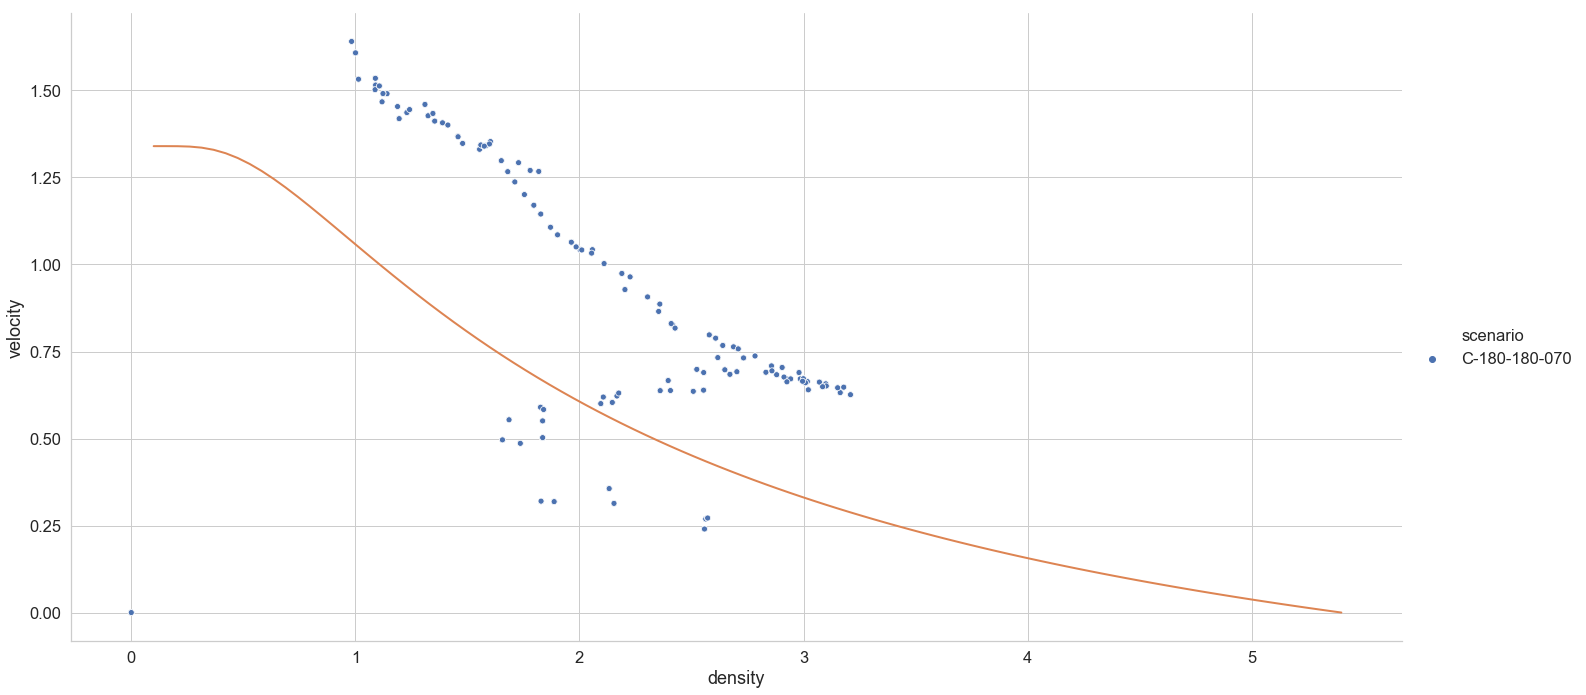

In [66]:
# transform data frame
plotFundamentalDiagram(project, "aTimeStep.fundamentalDiagram")

## Method B Plots

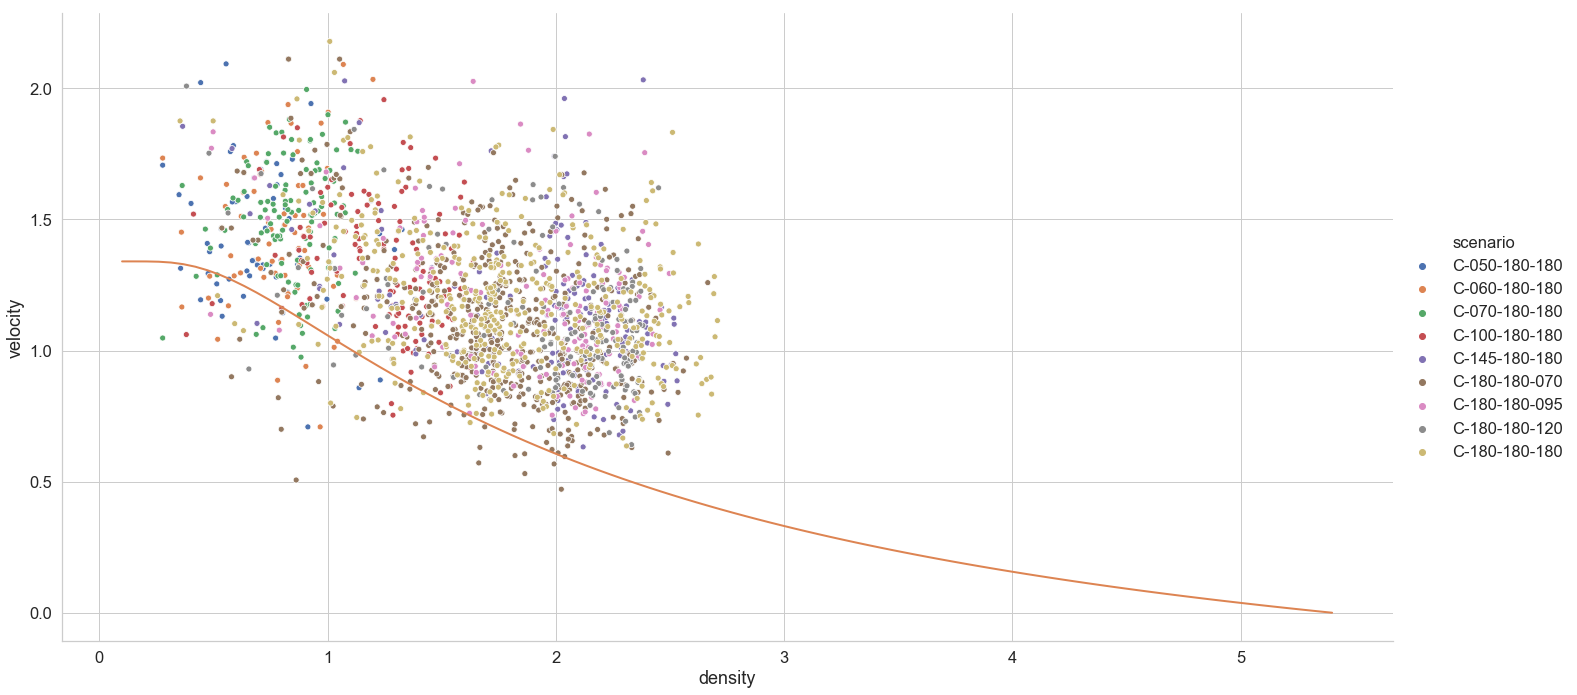

In [61]:
plotFundamentalDiagram(project, "bPedestrian.fundamentalDiagram")

## Method C Plots (classical density)

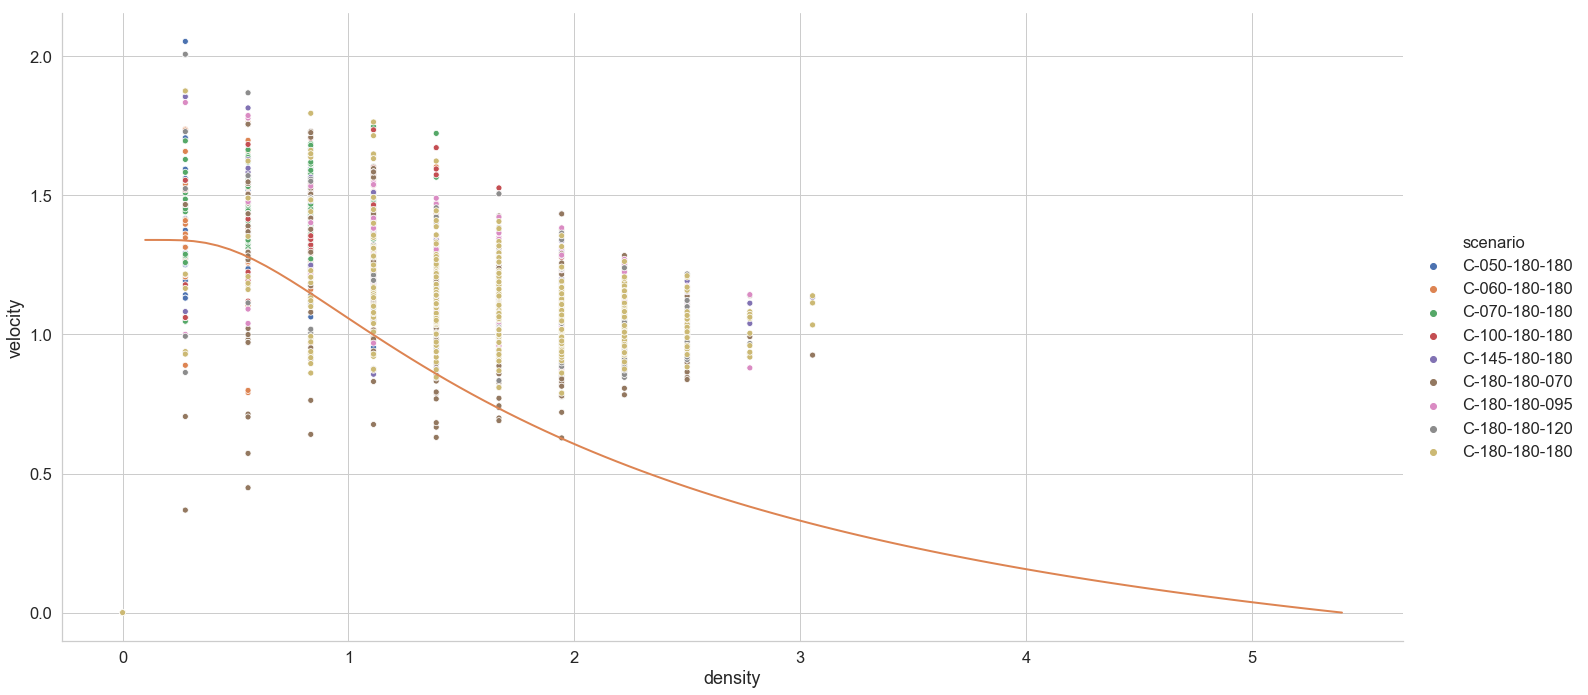

In [62]:
plotFundamentalDiagram(project, "cTimeStep.fundamentalDiagram")

## Method E Plots (voronoi density)

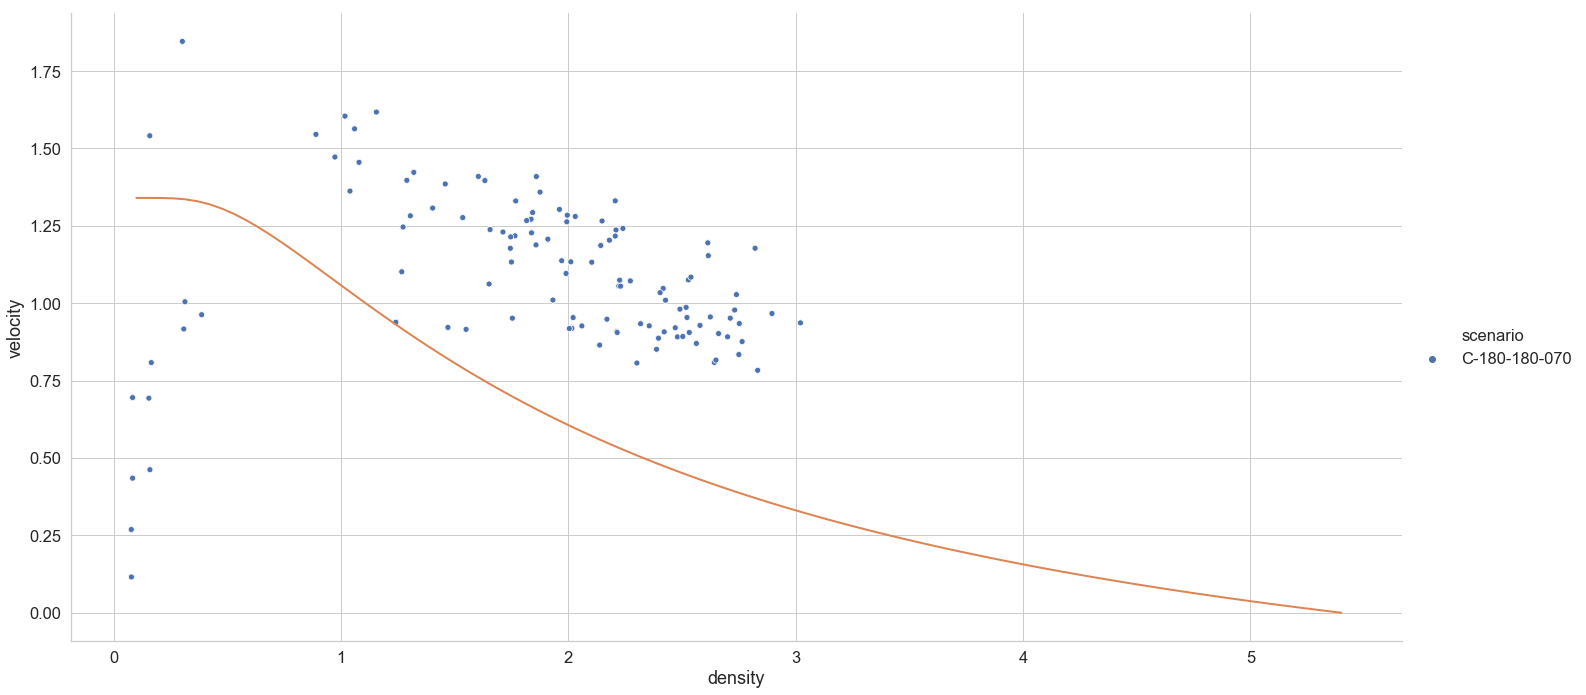

In [67]:
plotFundamentalDiagram(project, "eTimeStep.fundamentalDiagram")

## Method D Plots (voronoi density)

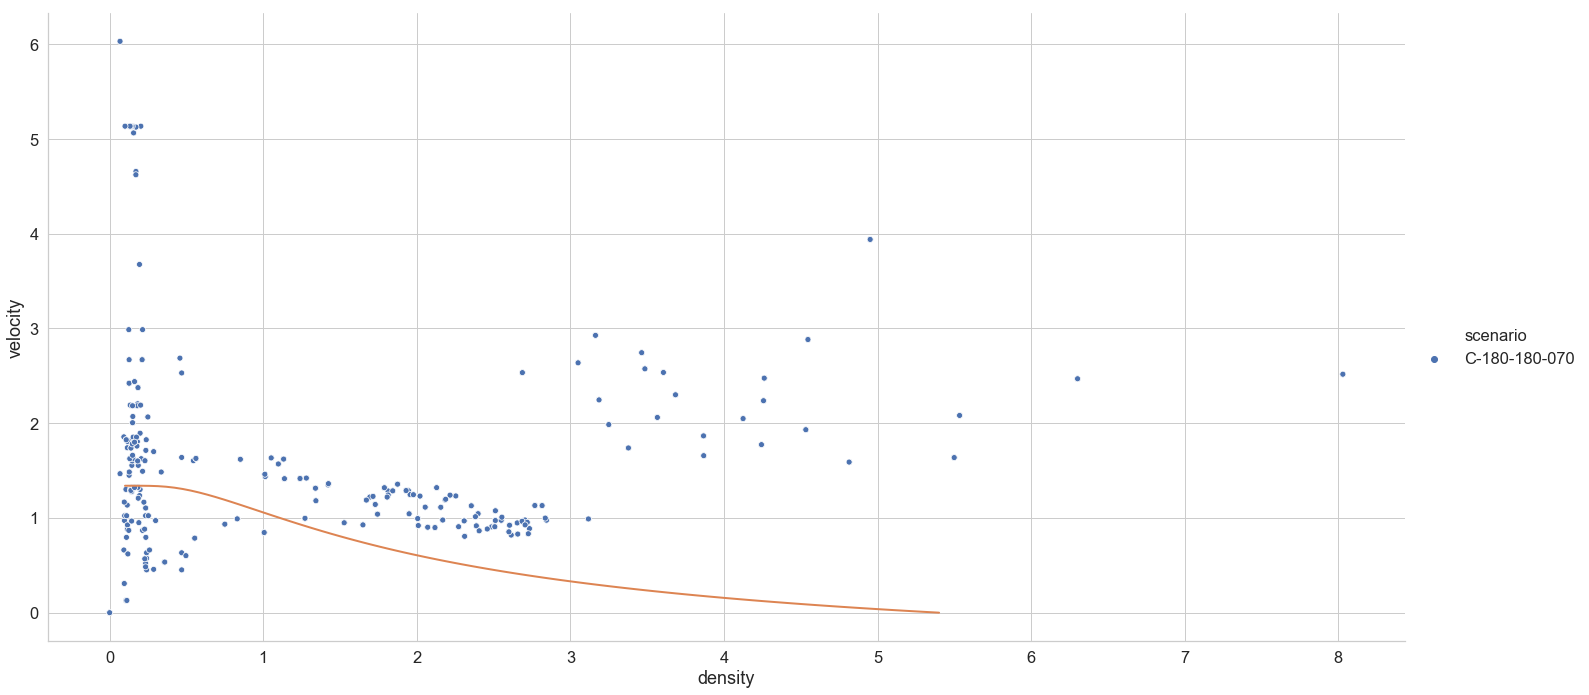

In [68]:
plotFundamentalDiagram(project, "dTimeStep.fundamentalDiagram")

In [128]:
np.linspace(0, 200, num=201).tolist()

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

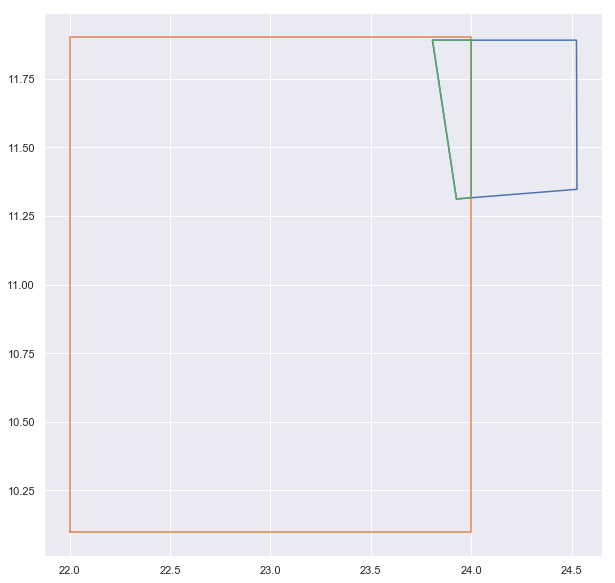

In [253]:
import matplotlib.pyplot as plt

coord1 = [[23.926582253991363,11.311616564587455],[24.526824188631515,11.346725287186784],[24.52439283212948,11.89],[23.80719398422859,11.89]]
coord1.append(coord1[0])
coord2 = [[22.0,10.1], [24.0,10.1], [24.0,11.9], [22.0,11.9], [22.0,10.1]]
coord2.append(coord2[0])
cap = [[23.926582253991363,11.311616564587455],[24.000000000000014,11.315910838495633],[24.000000000000025,11.889999999999956],[23.80719398422859,11.89]]
cap.append(cap[0])

xs1, ys1 = zip(*coord1) #create lists of x and y values
xs2, ys2 = zip(*coord2) 
xs3, ys3 = zip(*cap) 
plt.figure(figsize=(10,10))
plt.plot(xs1,ys1)
plt.plot(xs2,ys2)
plt.plot(xs3,ys3)
plt.show() # if you need...


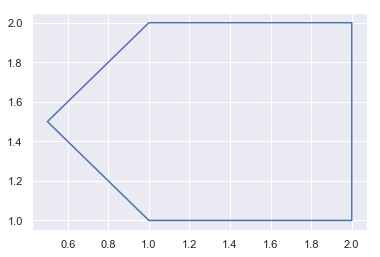

In [145]:
import matplotlib.pyplot as plt

coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show() # if you need..